In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

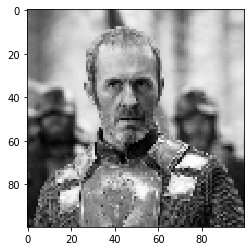

In [2]:
img=cv2.imread("sample_image.jpeg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.resize(img,(100,100))
plt.imshow(img,cmap="gray")

In [3]:
img.shape

(100, 100)

In [4]:
def convolution(img,filter):
    
    h=img.shape[0]
    w=img.shape[1]
    f=filter.shape[0]
    
    output_img=np.zeros((h-f+1,w-f+1))
    
    for i in tqdm(range(output_img.shape[0])):
        for j in range(output_img.shape[1]):
            for fi in range(f):
                for fj in range(f):
                    
                    output_img[i][j]+=(img[i+fi][j+fj]*filter[fi][fj])
                    
                    if output_img[i][j]>255:
                        output_img[i][j]=255
                    
                    elif output_img[i][j]<0:
                        output_img[i][j]=0
                    
    return output_img

# Blur Filter:

100%|█████████████████████████████████████████████████████████████████████████████████| 98/98 [00:00<00:00, 113.77it/s]


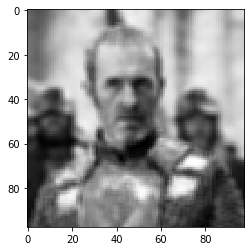

In [5]:
filter=np.ones((3,3))/9
output=convolution(img,filter)
plt.imshow(output,cmap="gray")

# Edge Filter:

100%|██████████████████████████████████████████████████████████████████████████████████| 98/98 [00:00<00:00, 98.03it/s]


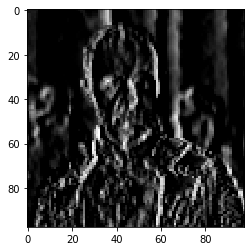

In [6]:
filter=np.array([[1,0,-1],
                 [1,0,-1],
                 [1,0,-1]])
output=convolution(img,filter)
plt.imshow(output,cmap="gray")

In [7]:
output.shape

(98, 98)

# Padding:

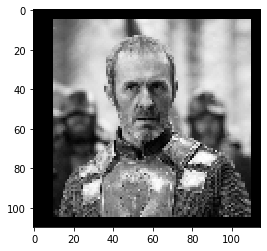

In [8]:
img=np.pad(img,((5,5),(10,5)),mode="constant",constant_values=255)
plt.imshow(img,cmap="gray")